<a href="https://colab.research.google.com/github/amiraama/Aplikasi-Login/blob/main/plantdisease_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise systemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
Found GPU at: /device:GPU:0


In [ ]:
import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt

In [ ]:
import warnings
warnings.filterwarnings("ignore")
tf.compat.v1.set_random_seed(0)
from tensorflow import keras
import numpy as np
np.random.seed(0)
import itertools
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
import csv
import string

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"amiraamalia","key":"43da9de855b9880a15cf40a75c76d447"}'}

In [ ]:
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

rm: cannot remove '/root/.kaggle': No such file or directory


In [ ]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset -p "/tmp/new-plant-diseases-dataset.zip"\

100% 2.69G/2.70G [00:22<00:00, 124MB/s]
100% 2.70G/2.70G [00:22<00:00, 131MB/s]


In [ ]:
#unzip
local_zip = '/tmp/new-plant-diseases-dataset.zip\/new-plant-diseases-dataset.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
#lalu tentukan train dan valid

In [ ]:
train_source_path = '/tmp/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'
val_source_path = '/tmp/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'

In [ ]:
train_gen = image_dataset_from_directory(directory=train_source_path,
                                         image_size=(256, 256))
val_gen = image_dataset_from_directory(directory=val_source_path,
                                        image_size=(256, 256))

rescale = Rescaling(scale=1.0/255)
train_gen = train_gen.map(lambda image,label:(rescale(image),label))
val_gen  = val_gen.map(lambda image,label:(rescale(image),label))

Found 70295 files belonging to 38 classes.
Found 17572 files belonging to 38 classes.


## Trying CNN
https://machinelearningmastery.com/choose-an-activation-function-for-deep-learning/

In [ ]:
#CNN Model##????
model = keras.Sequential()

# Add the convolutional layers
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same',input_shape=(256,256,3)))
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(pool_size=(3, 3)))

model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu',padding='same'))
model.add(keras.layers.MaxPooling2D(pool_size=(3, 3)))

model.add(keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(pool_size=(3, 3)))

model.add(keras.layers.Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(keras.layers.Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(pool_size=(3, 3)))

model.add(keras.layers.Conv2D(512,kernel_size=(5,5),activation="relu", padding='same'))
model.add(keras.layers.Conv2D(512,kernel_size=(5,5),activation="relu", padding='same'))
# Flatten the feature maps
model.add(keras.layers.Flatten())

# Add the dense layers
model.add(keras.layers.Dense(1568, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(38, activation='softmax'))

# Compile the model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 256, 256, 32)      896       
                                                                 
 conv2d_15 (Conv2D)          (None, 256, 256, 32)      9248      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 85, 85, 32)       0         
 2D)                                                             
                                                                 
 conv2d_16 (Conv2D)          (None, 85, 85, 64)        18496     
                                                                 
 conv2d_17 (Conv2D)          (None, 85, 85, 64)        36928     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 28, 28, 64)       0         
 2D)                                                  

In [ ]:
history=model.fit_generator(train_gen, epochs=5, validation_data=val_gen)

Epoch 1/5
2197/2197 [==============================] - 340s 147ms/step - loss: 1.7860 - accuracy: 0.4721 - val_loss: 0.7895 - val_accuracy: 0.7439
Epoch 2/5
2197/2197 [==============================] - 304s 138ms/step - loss: 0.5087 - accuracy: 0.8351 - val_loss: 0.3913 - val_accuracy: 0.8716
Epoch 3/5
2197/2197 [==============================] - 303s 138ms/step - loss: 0.2879 - accuracy: 0.9053 - val_loss: 0.2166 - val_accuracy: 0.9268
Epoch 4/5
2197/2197 [==============================] - 302s 137ms/step - loss: 0.1892 - accuracy: 0.9368 - val_loss: 0.2379 - val_accuracy: 0.9226
Epoch 5/5
2197/2197 [==============================] - 302s 137ms/step - loss: 0.1381 - accuracy: 0.9538 - val_loss: 0.1385 - val_accuracy: 0.9528


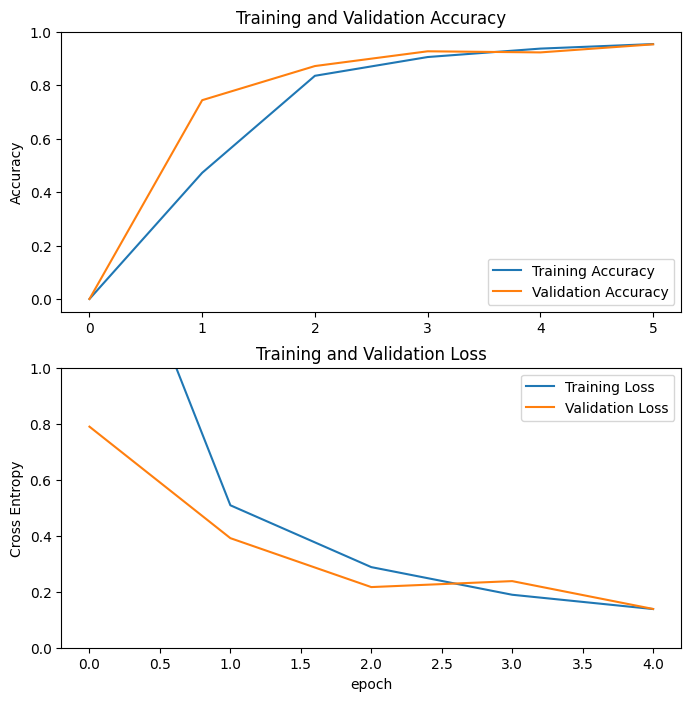

In [ ]:
acc = [0.] + history.history['accuracy']
val_acc = [0.] + history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
model.save("plant_disease_cnn.h5")

In [ ]:
model = tf.keras.models.load_model('/content/plant_disease_cnn.h5')

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

In [ ]:
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)